<a href="https://colab.research.google.com/github/iagomauricioo/data_science/blob/main/mapa_marechal_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import folium
import pandas as pd
from geopy.distance import geodesic
from IPython.display import HTML
import matplotlib.pyplot as plt

In [4]:
barra_sao_miguel_coords = [-9.8379, -35.8979]
marechal_deodoro_coords = [-9.7092, -35.8964]

In [5]:
center_lat = (barra_sao_miguel_coords[0] + marechal_deodoro_coords[0]) / 2
center_lon = (barra_sao_miguel_coords[1] + marechal_deodoro_coords[1]) / 2
center_coords = [center_lat, center_lon]

In [6]:
m = folium.Map(location=center_coords, zoom_start=12)

In [7]:
folium.Marker(location=barra_sao_miguel_coords, popup='Barra de São Miguel', icon=folium.Icon(color='blue'), zIndexOffset=1000).add_to(m)
folium.Marker(location=marechal_deodoro_coords, popup='Marechal Deodoro', icon=folium.Icon(color='green'), zIndexOffset=1000).add_to(m)

In [8]:
radius = 10000  # 10 km em metros
folium.Circle(location=center_coords, radius=radius, color='red', fill=True, fill_color='red', fill_opacity=0.2).add_to(m)

In [ ]:
m

# Área onde será realizado o mapa de calor em breve.

In [9]:
arquivo_excel = '/content/drive/MyDrive/coordenadas.xlsx'
#arquivo_excel = '/content/coordenadas (1).xlsx'
df = pd.read_excel(arquivo_excel)
df = df[['tipo', 'cidade', 'coordenadas']]
df.dropna(inplace=True)
df

,tipo,cidade,coordenadas
0,Mercado/Conven.,Barra de São Miguel,"-9.840822033037991, -35.905050152891015"
1,Mercado/Conven.,Barra de São Miguel,"-9.841170945190338, -35.904413953028474"
2,Mercado/Conven.,Barra de São Miguel,"-9.843521890587615, -35.903697672912195"
3,Mercado/Conven.,Barra de São Miguel,"-9.84291147460505, -35.9020740760202"
4,Mercado/Conven.,Barra de São Miguel,"-9.842722965624427, -35.90114136570571"
...,...,...,...
121,Restaurante/Bar,Barra de São Miguel,"-9.829497119737828, -35.88242594265559"
122,Restaurante/Bar,Barra de São Miguel,"-9.82867255434225, -35.88154617812104"
123,Restaurante/Bar,Barra de São Miguel,"-9.823851976990152, -35.88748458883844"
124,Restaurante/Bar,Barra de São Miguel,"-9.823730404505593, -35.88716808818271"


In [10]:
df_quantitativo = pd.read_excel(arquivo_excel)
df_quantitativo = df_quantitativo[['região', 'tipo.1', 'qtd. estabelecimentos']]
df_quantitativo.rename(columns= {
    'região':'Região',
    'tipo.1':'Tipo',
    'qtd. estabelecimentos':'Quantidade'
    }, inplace=True)
df_quantitativo.dropna(inplace=True)
df_quantitativo

,Região,Tipo,Quantidade
0,Marechal Deodoro,Mercado/Conven.,21.0
1,Marechal Deodoro,Hotel/Pousada,28.0
2,Marechal Deodoro,Restaurante/Bar,25.0
3,Barra de São Miguel,Mercado/Conven.,13.0
4,Barra de São Miguel,Hotel/Pousada,20.0
5,Barra de São Miguel,Restaurante/Bar,23.0


In [12]:
data = df[['tipo', 'coordenadas']]
data[['latitude', 'longitude']] = data['coordenadas'].str.split(',', expand=True)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
data = data.drop('coordenadas', axis=1)
data.dropna(inplace=True)
data

,tipo,latitude,longitude
0,Mercado/Conven.,-9.840822,-35.905050
1,Mercado/Conven.,-9.841171,-35.904414
2,Mercado/Conven.,-9.843522,-35.903698
3,Mercado/Conven.,-9.842911,-35.902074
4,Mercado/Conven.,-9.842723,-35.901141
...,...,...,...
121,Restaurante/Bar,-9.829497,-35.882426
122,Restaurante/Bar,-9.828673,-35.881546
123,Restaurante/Bar,-9.823852,-35.887485
124,Restaurante/Bar,-9.823730,-35.887168


In [22]:
for _, row in data[data['tipo'] == 'Mercado'].iterrows():
    m.add_child(
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup="Tipo de estabelecimento: Mercado",
            icon=folium.Icon(color='purple')
        )
    )

# Comparação
Para efeitos de comparação, na primeira imagem abaixo podemos ver uma imagem diretamente do Google Maps. Já na segunda imagem, vemos um mapa feito em python com os locais traçados iguais ao google maps. (Apenas para vermos o quão parecido está para ter uma noção de margem de erros).

In [14]:
iframe_code = """
<iframe src="https://www.google.com/maps/embed?pb=!1m16!1m12!1m3!1d31449.56301026032!2d-35.90486405726632!3d-9.833951979960371!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!2m1!1ssupermercado!5e0!3m2!1spt-BR!2sbr!4v1718769099993!5m2!1spt-BR!2sbr" width="600" height="450" style="border:0;" allowfullscreen="" loading="lazy" referrerpolicy="no-referrer-when-downgrade"></iframe>
"""

HTML(iframe_code)


## Na imagem acima, vemos a quantidade de supermercados na Barra de São Miguel.

In [15]:
m

In [16]:
hotels = df[df['tipo'] == 'Hotel/Pousada']
hotels.head(3)

,tipo,cidade,coordenadas
34,Hotel/Pousada,Barra de São Miguel,"-9.845913829636691, -35.904858178106075"
35,Hotel/Pousada,Barra de São Miguel,"-9.844032219592265, -35.90018040561898"
36,Hotel/Pousada,Barra de São Miguel,"-9.842319733663976, -35.89861399549438"


In [21]:
for _, row in data[data['tipo'] == 'Hotel/Pousada'].iterrows():
    m.add_child(
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup="Tipo de estabelecimento: Hotel/Pousada",
            icon=folium.Icon(color='orange')
        )
    )

In [24]:
legend_html = '''
     <div style="
     position: fixed;
     bottom: 50px; left: 50px; width: 200px; height: 200px;
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; padding: 10px;
     ">
     <h4>Legenda</h4>
     <i class="fa fa-map-marker" style="color:#36bdee"></i>Barra de São Miguel<br>
     <i class="fa fa-map-marker" style="color:green"></i>Marechal<br>
     <i class="fa fa-map-marker" style="color:orange"></i>Hotel/Pousada<br>
     <i class="fa fa-map-marker" style="color:#a25bf7"></i>Supermercado<br>
     <i class="fa fa-map-marker" style="color:red"></i>Restaurante/Bar<br>
     </div>
     '''

In [25]:
m.get_root().html.add_child(folium.Element(legend_html))

In [26]:
m

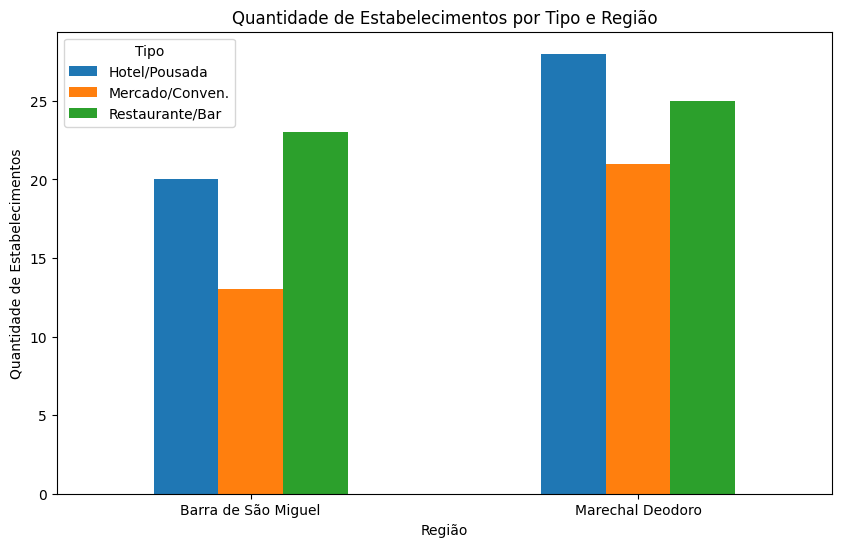

In [11]:
# @title Quantidade de estabelecimentos por região

df_grouped = df_quantitativo.groupby(['Região', 'Tipo'])['Quantidade'].sum().unstack()

df_grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Região')
plt.ylabel('Quantidade de Estabelecimentos')
plt.title('Quantidade de Estabelecimentos por Tipo e Região')
plt.xticks(rotation=0)
_ = plt.legend(title='Tipo')